In [1]:
import time
import helper_functions as hf
import functions as f
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from matplotlib.colors import ListedColormap

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
paths = hf.setup_paths("mouse")
print(f"Project paths created: {paths}")

Project paths created: {'data': './data/mouse', 'results': './results/mouse', 'masks': './data/mouse/masks'}


# 1 -- Loading DA3 model

In [3]:
# Testing the model loading
model, device = f.load_da3_model()
print("Model loaded successfully.")

Using device: cuda
[INFO ] using SwiGLU layer as FFN
[INFO ] using MLP layer as FFN
Model loaded successfully.


# 2 -- Loading images 

In [4]:
# Load images for testing
images = f.load_images_from_folder(paths['data'])

Found 7 images in ./data/mouse


# 3 -- Running DA3 for depth and poses 

[INFO ] Processed Images Done taking 0.029520511627197266 seconds. Shape:  torch.Size([7, 3, 378, 504])
[INFO ] Selecting reference view using strategy: saddle_balanced
[INFO ] Model Forward Pass Done. Time: 1.4607367515563965 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002458810806274414 seconds
 Depth maps shape: (7, 378, 504)
 Extrinsics shape: (7, 3, 4)
 Intrinsics shape: (7, 3, 3)
 Confidence shape: (7, 378, 504)


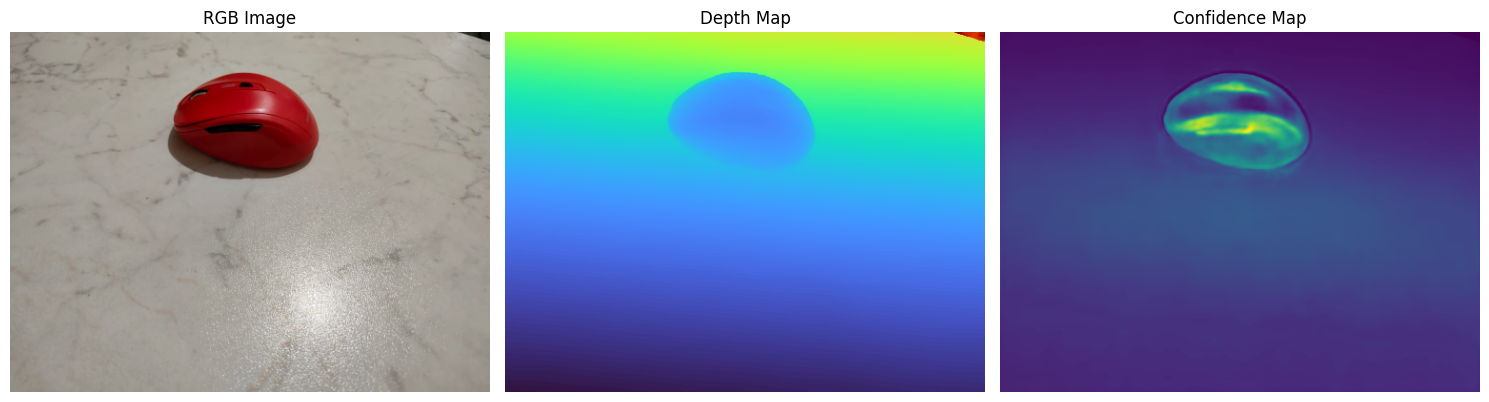

In [5]:
# running the model on loaded images
prediction = f.run_da3_model(model, images)

hf.visualize_depth_and_confidence(
    prediction.processed_images,
    prediction.depth,
    prediction.conf,
    sample_idx = 0
)

# 4 -- Generating 3D Point Cloud from depth maps 

In [6]:
points_3d, colours_3d = f.merge_pointclouds(prediction, conf_threshold = 0.8)
hf.save_point_cloud(points_3d, colours_3d, save_path = "mouse.ply")

Merged point cloud has 1333584 points.
Saved point cloud to: mouse.ply


## 4.1 -- Cleaning the 3D Geometry

In [ ]:
# try to clean the 3D Geometry with open3d

start = time.time()
clean_pts , clean_cols = f.clean_point_cloud(points_3d, colours_3d)
end = time.time()
print(f"\n[Open3D] Cleaned shape: {clean_pts.shape}")
print(f"[Open3D] Cleaning took {end - start:.4f} seconds.")

hf.save_point_cloud(clean_pts, clean_cols, save_path = "mouse_open3d.ply")


[Open3D] Cleaned shape: (1295442, 3)
[Open3D] Cleaning took 0.8618 seconds.
Saved point cloud to: mouse_open3d.ply


In [ ]:
# # try to clean the 3D Geometry with scipy

# start = time.time()
# clean_pts_s , clean_cols_s = f.clean_point_cloud_scipy(points_3d, colours_3d)
# end = time.time()
# print(f"\n[Scipy] Cleaned shape: {clean_pts_s.shape}")
# print(f"[Scipy] Cleaning took {end - start:.4f} seconds.")

# hf.save_point_cloud(clean_pts_s, clean_cols_s, save_path = "mouse_scipy.ply")

# 5 -- Export GLB and Gaussian Splatting PLY`

In [9]:
export_prediction = f.export_da3_outputs(model, images, paths['results'])

[INFO ] Processed Images Done taking 0.02556753158569336 seconds. Shape:  torch.Size([7, 3, 378, 504])
[INFO ] Selecting reference view using strategy: saddle_balanced
[INFO ] Model Forward Pass Done. Time: 1.1454551219940186 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009262561798095703 seconds
[INFO ] conf_thresh_percentile: 40.0
[INFO ] num max points: 10000000
[INFO ] Exporting to GLB with num_max_points: 10000000


Moviepy - Building video ./results/mouse/gs_video/0000_extend.mp4.
Moviepy - Writing video ./results/mouse/gs_video/0000_extend.mp4



Moviepy - Done !
Moviepy - video ready ./results/mouse/gs_video/0000_extend.mp4
[INFO ] Export Results Done. Time: 2.9963369369506836 seconds
Exported to: ./results/mouse
